## K-means model

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data (iris dataset)
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# unique species
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

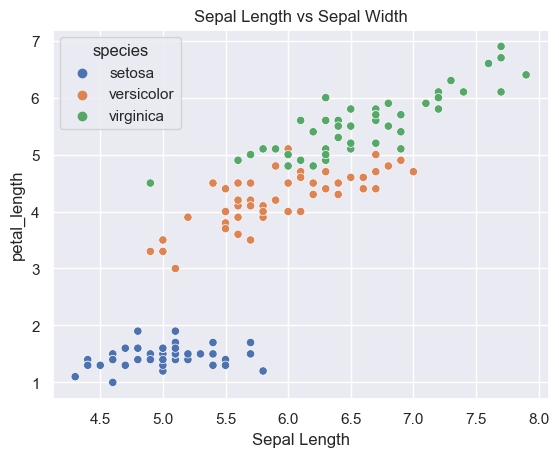

In [3]:
# create a scatter plot colored by species
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris)
plt.xlabel('Sepal Length')
plt.ylabel('petal_length')
plt.title('Sepal Length vs Sepal Width')
plt.show()

In [4]:
# create a data copy removing the species column
iris_copy = iris.copy()
iris_copy = iris_copy.drop('species', axis=1)
iris_copy.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
# create our kmeans model
from sklearn.cluster import KMeans

# create a kmeans model with 3 clusters
kmeans = KMeans(n_clusters=3, n_init='auto')

# fit the model
kmeans.fit(iris_copy)

# create a new column with the cluster labels
iris['kmeans_cluster'] = kmeans.labels_

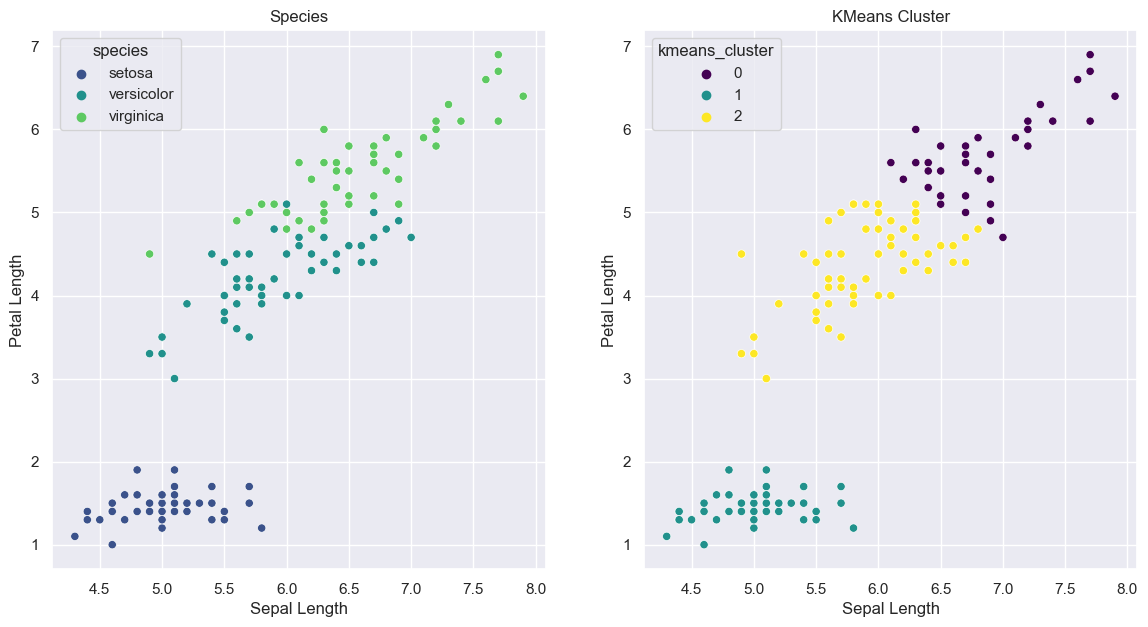

In [12]:
# create two scatter plot colored by species and kmeans cluster labels
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Petal Length')
ax[0].set_title('Species')

sns.scatterplot(x='sepal_length', y='petal_length', hue='kmeans_cluster', data=iris, ax=ax[1], palette='viridis')
ax[1].set_xlabel('Sepal Length')
ax[1].set_ylabel('Petal Length')
ax[1].set_title('KMeans Cluster')
plt.show()

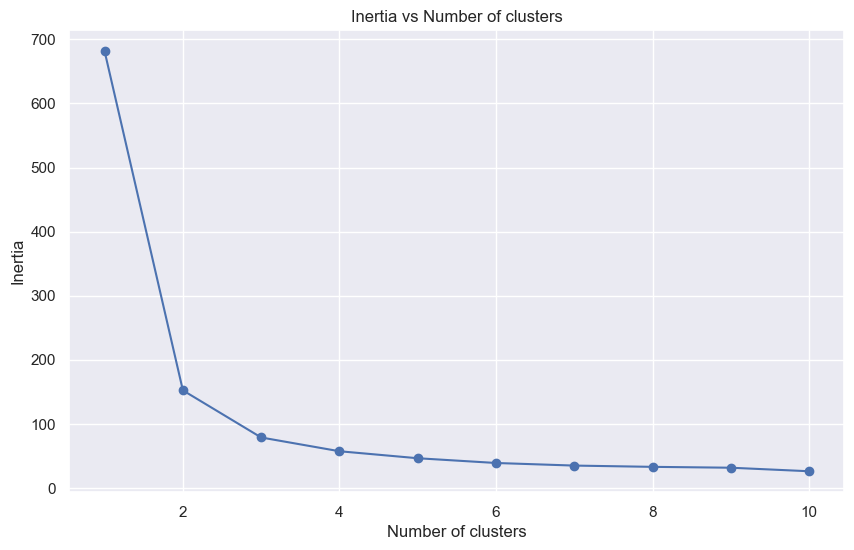

In [7]:
## get the optimal number of clusters

# create a list to store the inertia values
inertia = []

# create a loop to fit the model with a different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init='auto')
    kmeans.fit(iris_copy)
    inertia.append(kmeans.inertia_)

# create a plot to visualize the inertia values
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of clusters')
plt.show()

In [13]:
## Metrics that we can extract from the kmeans model

# get the cluster centers
print("Centers of the model: ", kmeans.cluster_centers_)

# get the number of iterations
print("Number of iterations: ", kmeans.n_iter_)

# get the inertia
print("Inertia: ", kmeans.inertia_)

# get the labels
print("Labels: ", kmeans.labels_)

Centers of the model:  [[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
Number of iterations:  5
Inertia:  78.8556658259773
Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


Text(0.5, 1.0, 'KMeans Cluster')

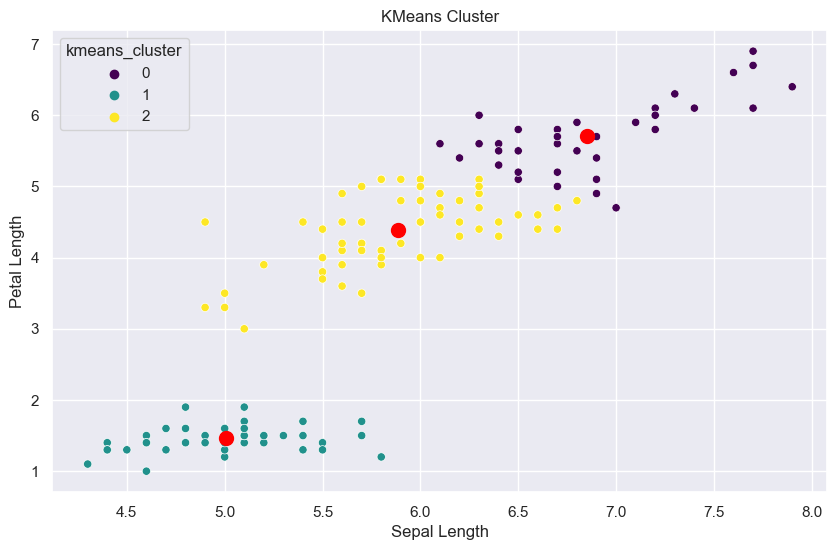

In [14]:
# plot our clusters with the centers and the labels
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='petal_length', hue='kmeans_cluster', data=iris, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], c='red', s=100, label='Centers')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('KMeans Cluster')

## Hierarchical Clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering

# Perform Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(iris_copy)

# Print the cluster labels for each data point
print(agg_clustering.labels_)

# create a new column with the cluster labels
iris['hc_cluster'] = agg_clustering.labels_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


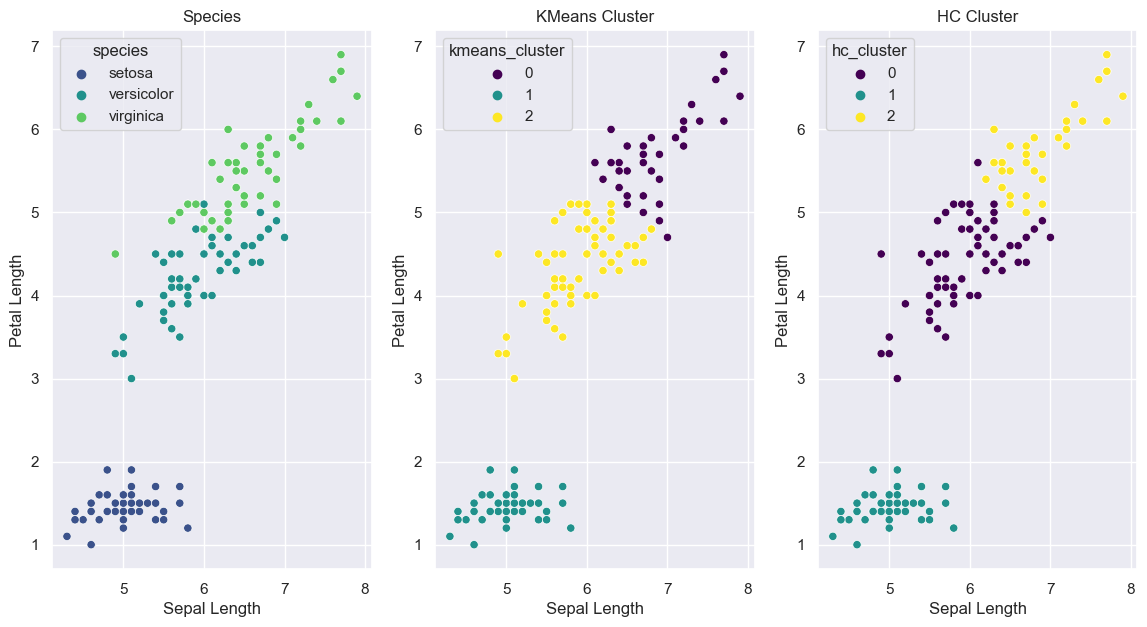

In [18]:
# create two scatter plot colored by species and kmeans cluster labels
fig, ax = plt.subplots(1, 3, figsize=(14, 7))

sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=iris, ax=ax[0], palette='viridis')
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Petal Length')
ax[0].set_title('Species')

sns.scatterplot(x='sepal_length', y='petal_length', hue='kmeans_cluster', data=iris, ax=ax[1], palette='viridis')
ax[1].set_xlabel('Sepal Length')
ax[1].set_ylabel('Petal Length')
ax[1].set_title('KMeans Cluster')

sns.scatterplot(x='sepal_length', y='petal_length', hue='hc_cluster', data=iris, ax=ax[2], palette='viridis')
ax[2].set_xlabel('Sepal Length')
ax[2].set_ylabel('Petal Length'
ax[2].set_title('HC Cluster')
plt.show()

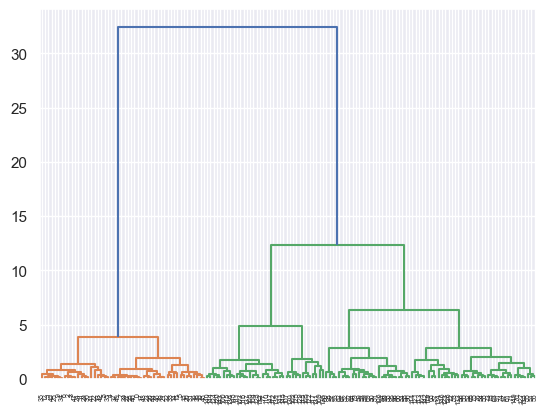

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Compute the linkage matrix
Z = linkage(iris_copy, 'ward')

# Plot the dendrogram
dendrogram(Z)
plt.show()

In [20]:
from scipy.cluster.hierarchy import fcluster

# Extract the flat clustering solution
clusters = fcluster(Z, t=3, criterion='maxclust')

# Assign each data point to a single cluster
print(clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 2 2 2 3 2 2 2 2
 2 2 3 3 2 2 2 2 3 2 3 2 3 2 2 3 3 2 2 2 2 2 3 3 2 2 2 3 2 2 2 3 2 2 2 3 2
 2 3]
